# Floating Point and Neural Networks

In this demo, we will introduce neural networks and explore some considerations that must be made when using floating point numbers with them.


Neural networks are a convienient means for representing multivariable functions aka, $f : \mathbb{R^m} \rightarrow \mathbb{R^n}$. They are made up of a sequence of layers, biases, and activation functions. The first layer is the input layer and it is where the input vector, $\mathbb{R^m}$ is put into the network. To go from one layer to another, the following equation is applied: $  \mathbf{x_l} = g(\mathbf{W_l} \mathbf{x_{l-1}} + \mathbf{b_l} ) $.


Assuming the simplest case, where the activation function is the identity function and the biases are 0, a neural network just becomes a sequence of matrix vector products. For the case of a 3 layer neural network, the function would look like: $f(\mathbf{x}) = \mathbf{W_2}\mathbf{W_1} \mathbf{W_0} \mathbf{x}$

They have been shown to be capable of universally approximating any function $f : \mathbb{R^m} \rightarrow \mathbb{R^n}$, assuming you have enough nodes and layers in your network.



In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1./(1+np.exp(-x))

In [35]:
def create_neural_network(layers):
    G = nx.Graph()
    pos = {}
    # Create all the nodes
    for l in range(len(layers)):
        for i in range(layers[l]):
            G.add_node(1000*l + i)
            pos[1000*l + i] = np.array([l, 10*(i+1)/(layers[l]+1)])


    # Add the edges between all the nodes
    for l in range(len(layers)-1):
        for i in range(layers[l]):
            for j in range(layers[l+1]):
                G.add_edge(1000*l+i, 1000*(l+1)+j)
    
    return G, pos
m,n =2,2
G, pos = create_neural_network([m, 5, 3, n])



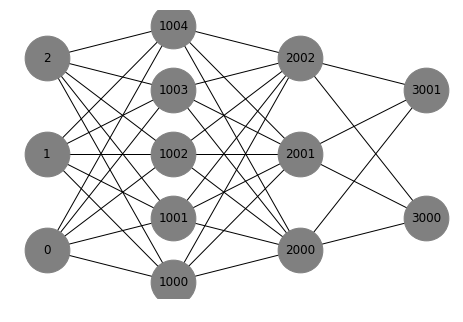

In [40]:
nx.draw(G, pos=pos, with_labels=True, 
        node_size=2000,
        node_color='gray', edge_color='k')

## The Softmax Function

The functions that neural networks are often used to approximate are probability distributions. For example, if you are try to classify $28 \times 28$ images as cats, dogs, or lemurs then the function your network is approximating is $f : \mathbb{R^{28 \times 28}} \rightarrow \mathbb{R^3}$. Your output in each dimension would then be the probability that the image is a cat, dog, or lemur. Furthermore, since it a probability distribution, it is required that those three outputs should sum to 1.


One way to guarantee this property, that the outputs sum to 1, is to use the softmax function as the activation function for the final layer of the neural network.